In [1]:
import pandas as pd
import numpy as np
import datashader as ds
from scipy.spatial import Delaunay
import datashader.utils as du, datashader.transfer_functions as tf

import plotly
import plotly.graph_objects as go

In [7]:
df = pd.read_csv('extra_features.csv', index_col=0)

lat_lons = pd.read_csv('climateChallengeData/grid2latlon.csv')
df.loc[df.elevation_mean < 0, 'elevation_mean'] = 0
df = df.merge(lat_lons, left_index=True, right_index=True)

df.head()

,field_1,X,Y,green_cove,green_co_1,green_co_2,green_co_3,landuse_majority,elevation_mean,elevation_range,elevation_majority,slope_mean,orientation_mean,nx,ny,LAT,LON
0,0,3.655359e+06,2.070910e+06,5297,726516,137.156126,141.0,312.0,199.254802,59.430008,190.740005,20.960422,224.190428,186,227,41.424183,2.052902
1,1,3.655450e+06,2.070801e+06,5945,849799,142.943482,147.0,311.0,199.392714,62.229996,194.850006,22.828920,145.431366,187,226,41.423294,2.054112
2,2,3.655459e+06,2.070900e+06,3737,511437,136.857640,139.0,312.0,221.252228,52.389999,221.179993,20.978525,245.407737,187,227,41.424194,2.054099
3,3,3.655456e+06,2.069699e+06,6501,922808,141.948623,144.0,311.0,409.811718,63.619995,387.880005,23.704270,198.288128,188,215,41.413395,2.055452
4,4,3.655464e+06,2.069798e+06,8129,1162246,142.975274,146.0,311.0,384.606403,53.549988,376.790009,21.304633,77.051443,188,216,41.414295,2.055439


In [9]:
elevations_grid = df.pivot_table(values='elevation_mean', columns='nx', index='ny')
elevations_grid.head()

nx,186,187,188,189,190,191,192,193,194,195,...,324,325,326,327,328,329,330,331,332,333
ny,,,,,,,,,,,,,,,,,,,,,
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


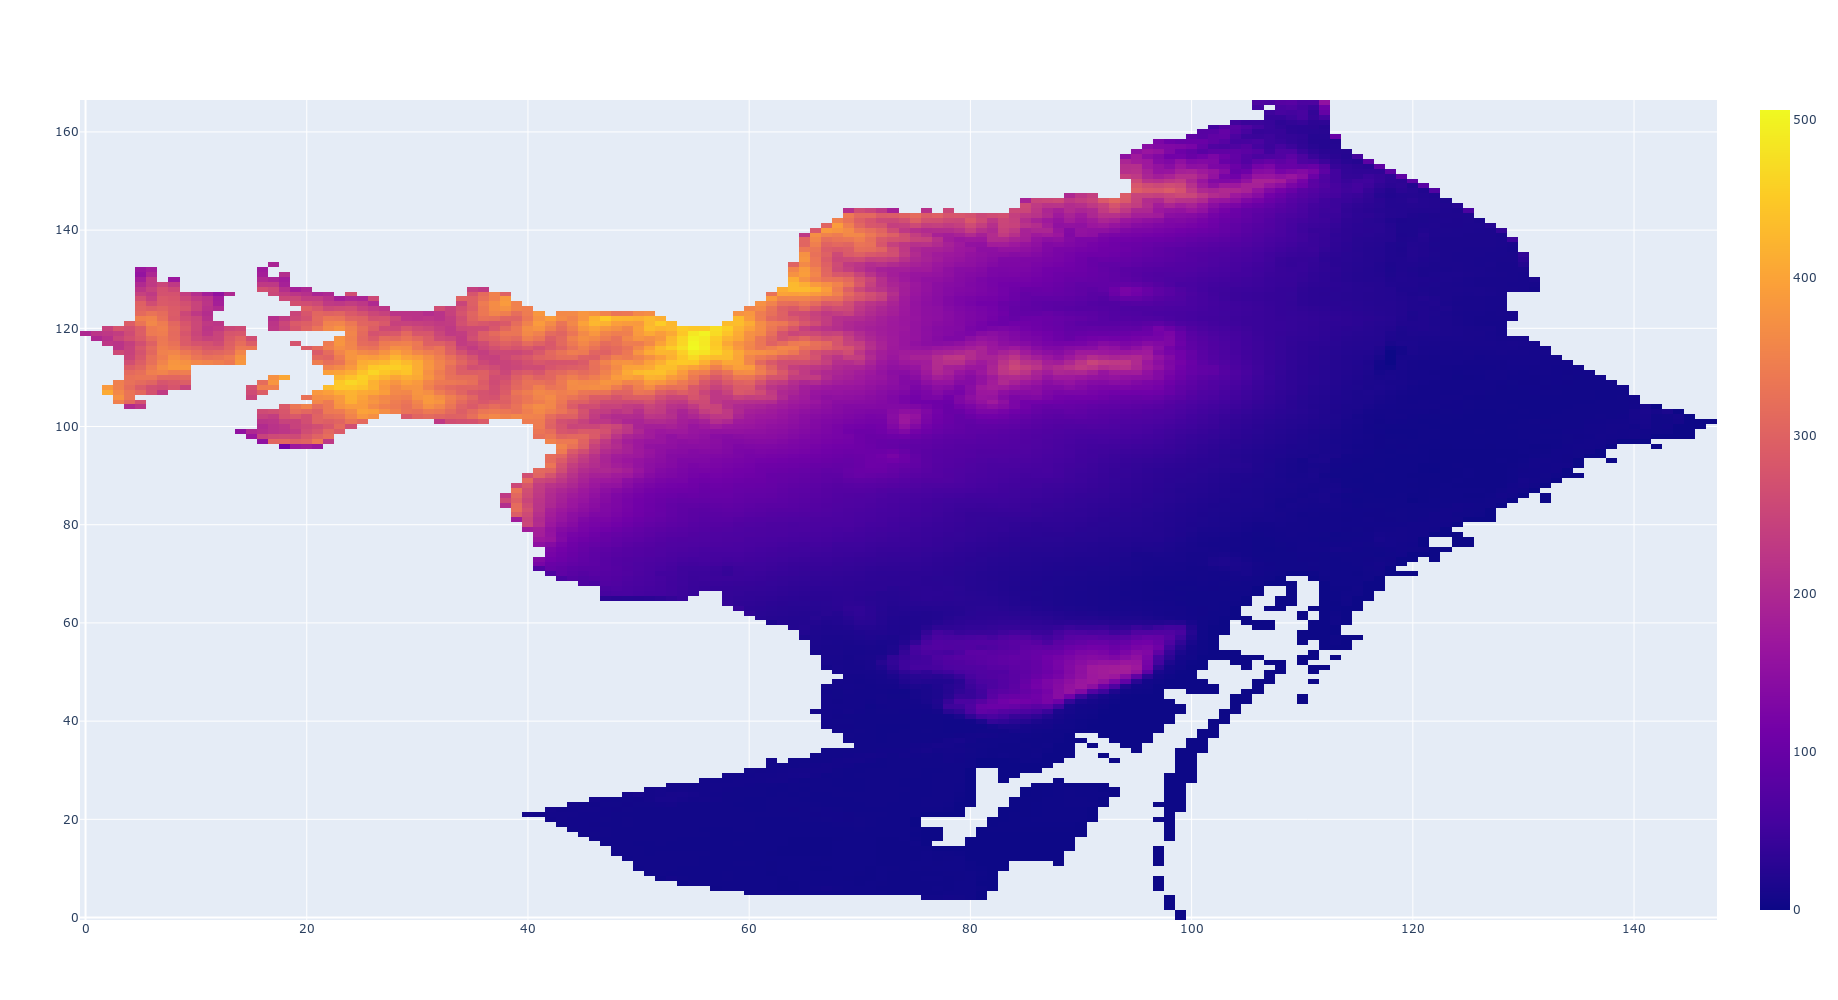

In [50]:
cont = go.Heatmap(z=elevations_grid)

fig = go.Figure(data=cont)
fig.update_layout(autosize=False,
                  width=1000, height=1000)

fig.show()

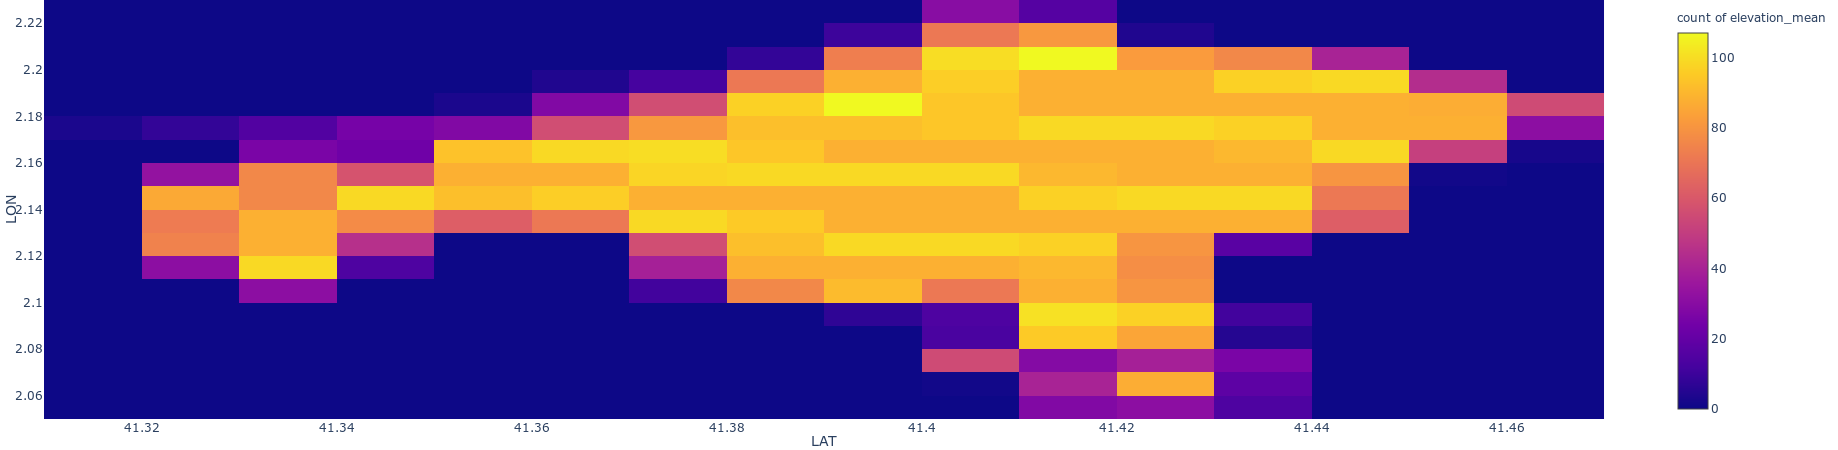

In [65]:
import plotly.express as px

fig = px.density_heatmap(df, x='LAT', y="LON",z='elevation_mean')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()